In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dt = pd.read_excel('/content/stringency_index_CERTA (6).xlsm')

In [ ]:
dt.head()

,país,date,código_do_país,stringency_index,fechamento_de_escolas,flag_fechamento_de_escolas,fechamentos_locais_de_trabalho,flag_fechamentos_locais_de_trabalho,cancelamento_eventos_locais_publicos,flag_cancelamento_eventos_locais_publicos,restrição_de_aglomerção_em_locais_privados,flag_restrição_de_aglomerção_em_locais_privados,fechamento_do_transporte_público,flag_fechamento_do_transporte_público,obrigatoriedade_de_ficar_em_casa,flag_obrigatoriedade__de_ficar_em_casa,movimentações_internas_entre_cidades_e_regiões,flag_movimentações_internas_entre_cidades_e_regiões,controle_de viagens_internacionais,ajuda_de custos_para_ quem_perdeu_emprego_ou_não_pode_trabalhar,flag_ajuda_de custos_para_quem_perdeu_emprego_ou_não_pode_trabalhar,alívio_de_dividas_e_contratos,estimulos_fiscais,ajuda_internacional,campanhas_públicas_de_conscientização,flag_campanhas_públicas_de_conscientização,política_de_testagem,rastreamento_de_contagio,investimento_emergencial_em_saúde,investimento_em_vacina,casos_confirmados,indíce_de_gini,%_da_população_urbana_vivendo_na_maior_cidade_do_país_região_ou_território,%_da_população_vivendo_em_aglomerações_com_mais_de_1M_de_hab.,%_da_população_total_vivendo_em_cidades,%_da_população_urbana_vivendo_em_favelas,qtd_cidades_pop_maior_17M,densidade_media_cidades_pop_maior_17M,qtd_cidades_pop_entre_17M_13M,densidade_media_cidades_pop_entre_17M_13M,qtd_cidades_pop_entre_13M_9M_AT,densidade_media_cidades_pop_entre_13M_9M,qtd_cidades_pop_entre_9M_1M,densidade_media_cidades_pop_entre_9M_1M,qtd_cidades_pop_entre_1M_500k,densidade_media_cidades_pop_entre_1M_500K,IDH_(cluster),IDH_(discretizado),PIB_per_capita,retail_and_recreation_percent_change_from_baseline_AE,grocery_and_pharmacy_percent_change_from_baseline_AE,parks_percent_change_from_baseline_AE,transit_stations_percent_change_from_baseline_AE,workplaces_percent_change_from_baseline_AE,residential_percent_change_from_baseline_AE,taxa_de_desemprego,Smoking_prevalence_2016_AT,GDP_Growth_rate_compared_to_previous_quarter_AE,NYSE_AE,NASDAQ_AE,LSE_AE,TSE_AE,SSE_AE,B3_AE
0,Aruba,2020-01-21,ABW,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,3,0,0.0,0.0,0,1,0,0,0.0,0.0,0,NaN,NaN,NaN,43.546,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,VERY HIGH,3,30262.48723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,2020-01-22,ABW,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,3,0,0.0,0.0,0,1,0,0,0.0,0.0,0,NaN,NaN,NaN,43.546,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,VERY HIGH,3,30262.48723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aruba,2020-01-23,ABW,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,3,0,0.0,0.0,0,1,0,0,0.0,0.0,0,NaN,NaN,NaN,43.546,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,VERY HIGH,3,30262.48723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,2020-01-24,ABW,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,3,0,0.0,0.0,0,1,0,0,0.0,0.0,0,NaN,NaN,NaN,43.546,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,VERY HIGH,3,30262.48723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,2020-01-25,ABW,0.0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,3,0,0.0,0.0,0,1,0,0,0.0,0.0,0,NaN,NaN,NaN,43.546,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,VERY HIGH,3,30262.48723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


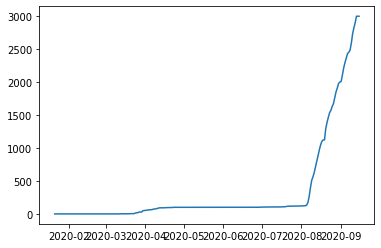

In [ ]:
aruba = dt.loc[dt['código_do_país']=='ABW']
plt.plot(aruba['date'],aruba['casos_confirmados'])

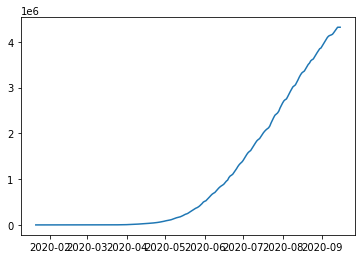

In [ ]:
brazil = dt.loc[dt['código_do_país']=='BRA']
plt.plot(brazil['date'],brazil['casos_confirmados'])

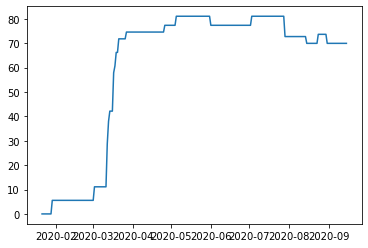

In [ ]:
plt.plot(brazil['date'],brazil['stringency_index'])

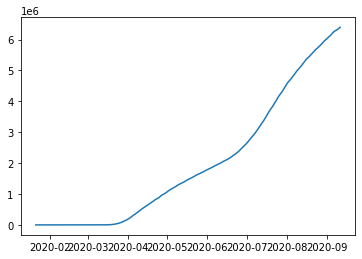

In [ ]:
USA = dt.loc[dt['código_do_país']=='USA']
plt.plot(USA['date'],USA['casos_confirmados'])

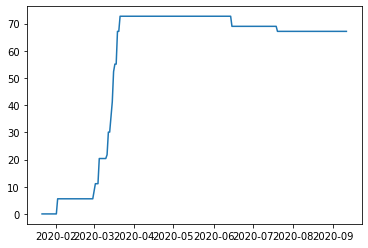

In [ ]:
plt.plot(USA['date'],USA['stringency_index'])

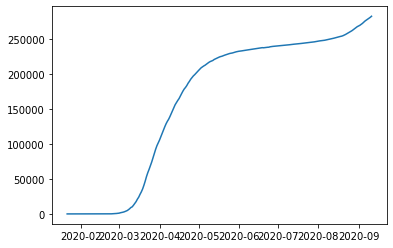

In [ ]:
Italy = dt.loc[dt['código_do_país']=='ITA']
plt.plot(Italy['date'],Italy['casos_confirmados'])

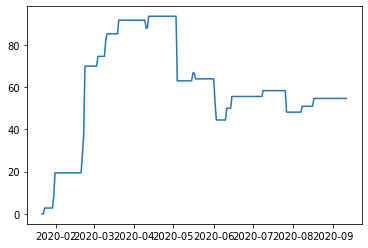

In [ ]:
plt.plot(Italy['date'],Italy['stringency_index'])

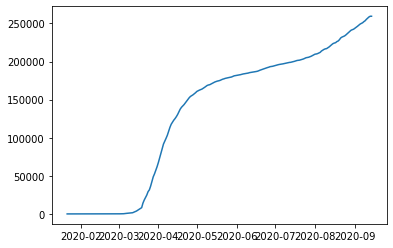

In [ ]:
Germany = dt.loc[dt['código_do_país']=='DEU']
plt.plot(Germany['date'],Germany['casos_confirmados'])

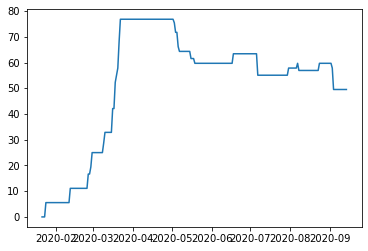

In [ ]:
plt.plot(Germany['date'],Germany['stringency_index'])

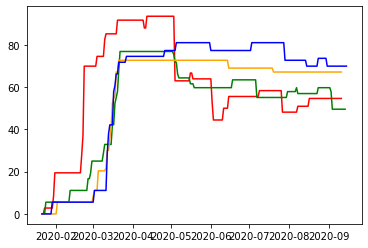

In [ ]:
plt.plot(Italy['date'],Italy['stringency_index'], color='red')
plt.plot(Germany['date'],Germany['stringency_index'], color='green')
plt.plot(USA['date'],USA['stringency_index'], color= 'orange')
plt.plot(brazil['date'],brazil['stringency_index'], color= 'blue')

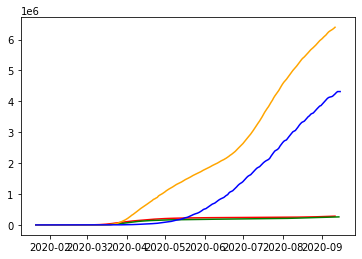

In [ ]:
plt.plot(Italy['date'],Italy['casos_confirmados'], color='red')
plt.plot(Germany['date'],Germany['casos_confirmados'], color='green')
plt.plot(USA['date'],USA['casos_confirmados'], color= 'orange')
plt.plot(brazil['date'],brazil['casos_confirmados'], color= 'blue')

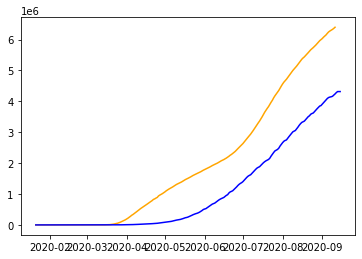

In [ ]:
plt.plot(USA['date'],USA['casos_confirmados'], color= 'orange')
plt.plot(brazil['date'],brazil['casos_confirmados'], color= 'blue')

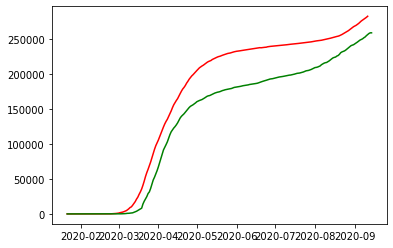

In [ ]:
plt.plot(Italy['date'],Italy['casos_confirmados'], color='red')
plt.plot(Germany['date'],Germany['casos_confirmados'], color='green')

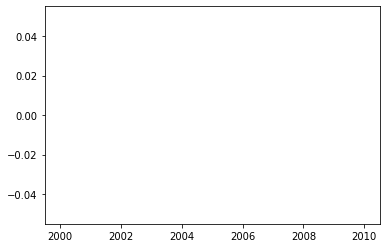

In [ ]:
cluster3 = dt.loc[(dt['país']=='Bermuda') & (dt['país']=='Switzerland') & (dt['país']=='Cayman Islands') & 
                  (dt['país']=='Ireland') & (dt['país']=='Iceland') & (dt['país']=='Luxembourg') & (dt['país']=='Macao') &
                  (dt['país']=='Norway')]
plt.plot(cluster3['date'],cluster3['casos_confirmados'])


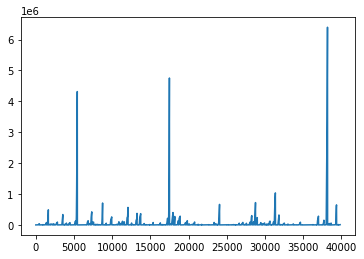

In [ ]:
plt.plot(dt['casos_confirmados'])

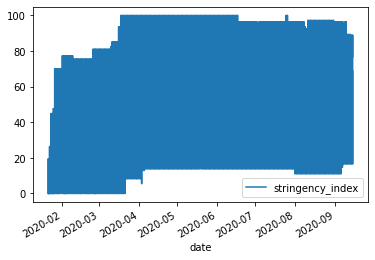

In [ ]:
dt.plot(x='date', y= 'stringency_index')

In [ ]:
df = dt[['stringency_index','casos_confirmados']]

In [ ]:
from sklearn.cluster import KMeans
X = df.values
X.shape

(39854, 2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39854 entries, 0 to 39853
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stringency_index   39854 non-null  float64
 1   casos_confirmados  39854 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 622.8 KB


Text(0, 0.5, 'Variações')

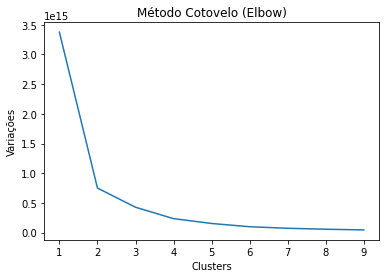

In [ ]:
variacoes = []
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)
plt.plot(range(1,10),variacoes)
plt.title('Método Cotovelo (Elbow)') 
plt.xlabel ('Clusters') 
plt.ylabel ('Variações')

In [ ]:
kmeans_final = KMeans(n_clusters=5)
kmeans_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_pred = kmeans_final.predict(X)
cluster_centro = kmeans_final.cluster_centers_
cluster_centro

array([[5.22939406e+01, 1.11275920e+04],
       [6.86076596e+01, 5.46504415e+06],
       [7.55621805e+01, 1.84428302e+06],
       [6.83359449e+01, 3.49947850e+05],
       [7.25320833e+01, 3.58879627e+06]])

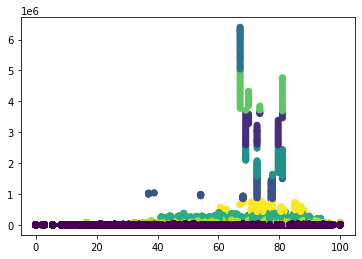

In [ ]:
plt.scatter(X[:,0], X[:,1], c = kmeans.labels_)
plt.scatter
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,0], c = 'red', label = 'Centroids')
#plt.legend()

plt.show()

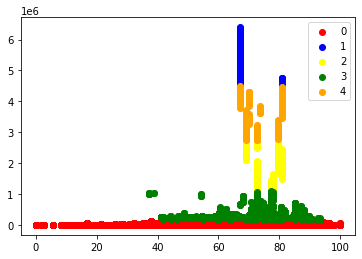

In [ ]:

plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], c='red', label='0')
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], c='blue', label='1')
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], c='yellow', label='2')
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], c='green',label='3')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1], c='orange',label='4')
#plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=100)
plt.legend()

In [ ]:
dt[kmeans_final.labels_==0].sum

<bound method DataFrame.sum of            país       date código_do_país  ...  TSE_AE  SSE_AE  B3_AE
0         Aruba 2020-01-21            ABW  ...     NaN     NaN    NaN
1         Aruba 2020-01-22            ABW  ...     NaN     NaN    NaN
2         Aruba 2020-01-23            ABW  ...     NaN     NaN    NaN
3         Aruba 2020-01-24            ABW  ...     NaN     NaN    NaN
4         Aruba 2020-01-25            ABW  ...     NaN     NaN    NaN
...         ...        ...            ...  ...     ...     ...    ...
39849  Zimbabwe 2020-09-11            ZWE  ...     NaN     NaN    NaN
39850  Zimbabwe 2020-09-12            ZWE  ...     NaN     NaN    NaN
39851  Zimbabwe 2020-09-13            ZWE  ...     NaN     NaN    NaN
39852  Zimbabwe 2020-09-14            ZWE  ...     NaN     NaN    NaN
39853  Zimbabwe 2020-09-15            ZWE  ...     NaN     NaN    NaN

[37845 rows x 64 columns]>

In [ ]:
dt[kmeans_final.labels_==1].sum

<bound method DataFrame.sum of                 país       date código_do_país  ...  TSE_AE  SSE_AE  B3_AE
17492          India 2020-09-11            IND  ...     NaN     NaN    NaN
17493          India 2020-09-12            IND  ...     NaN     NaN    NaN
17494          India 2020-09-13            IND  ...     NaN     NaN    NaN
17495          India 2020-09-14            IND  ...     NaN     NaN    NaN
17496          India 2020-09-15            IND  ...     NaN     NaN    NaN
38154  United States 2020-08-01            USA  ...     NaN     NaN    NaN
38155  United States 2020-08-02            USA  ...     NaN     NaN    NaN
38156  United States 2020-08-03            USA  ...     NaN     NaN    NaN
38157  United States 2020-08-04            USA  ...     NaN     NaN    NaN
38158  United States 2020-08-05            USA  ...     NaN     NaN    NaN
38159  United States 2020-08-06            USA  ...     NaN     NaN    NaN
38160  United States 2020-08-07            USA  ...     NaN     NaN  

In [ ]:
dt[kmeans_final.labels_==2].sum

<bound method DataFrame.sum of                 país       date código_do_país  ...  TSE_AE  SSE_AE    B3_AE
5349          Brazil 2020-06-23            BRA  ...     NaN     NaN  95975.0
5350          Brazil 2020-06-24            BRA  ...     NaN     NaN  94377.0
5351          Brazil 2020-06-25            BRA  ...     NaN     NaN  95983.0
5352          Brazil 2020-06-26            BRA  ...     NaN     NaN  93834.0
5353          Brazil 2020-06-27            BRA  ...     NaN     NaN  93834.0
...              ...        ...            ...  ...     ...     ...      ...
38120  United States 2020-06-28            USA  ...     NaN     NaN      NaN
38121  United States 2020-06-29            USA  ...     NaN     NaN      NaN
38122  United States 2020-06-30            USA  ...     NaN     NaN      NaN
38123  United States 2020-07-01            USA  ...     NaN     NaN      NaN
38124  United States 2020-07-02            USA  ...     NaN     NaN      NaN

[133 rows x 64 columns]>

In [ ]:
dt[kmeans_final.labels_==3].sum

<bound method DataFrame.sum of                país       date código_do_país  ...  TSE_AE  SSE_AE  B3_AE
1604      Argentina 2020-08-01            ARG  ...     NaN     NaN    NaN
1605      Argentina 2020-08-02            ARG  ...     NaN     NaN    NaN
1606      Argentina 2020-08-03            ARG  ...     NaN     NaN    NaN
1607      Argentina 2020-08-04            ARG  ...     NaN     NaN    NaN
1608      Argentina 2020-08-05            ARG  ...     NaN     NaN    NaN
...             ...        ...            ...  ...     ...     ...    ...
39372  South Africa 2020-09-10            ZAF  ...     NaN     NaN    NaN
39373  South Africa 2020-09-11            ZAF  ...     NaN     NaN    NaN
39374  South Africa 2020-09-12            ZAF  ...     NaN     NaN    NaN
39375  South Africa 2020-09-13            ZAF  ...     NaN     NaN    NaN
39376  South Africa 2020-09-14            ZAF  ...     NaN     NaN    NaN

[1733 rows x 64 columns]>

In [ ]:
dt[kmeans_final.labels_==4].sum

<bound method DataFrame.sum of                 país       date código_do_país  ...  TSE_AE  SSE_AE     B3_AE
5390          Brazil 2020-08-03            BRA  ...     NaN     NaN  102830.0
5391          Brazil 2020-08-04            BRA  ...     NaN     NaN  101216.0
5392          Brazil 2020-08-05            BRA  ...     NaN     NaN  102802.0
5393          Brazil 2020-08-06            BRA  ...     NaN     NaN  104126.0
5394          Brazil 2020-08-07            BRA  ...     NaN     NaN  102776.0
...              ...        ...            ...  ...     ...     ...       ...
38149  United States 2020-07-27            USA  ...     NaN     NaN       NaN
38150  United States 2020-07-28            USA  ...     NaN     NaN       NaN
38151  United States 2020-07-29            USA  ...     NaN     NaN       NaN
38152  United States 2020-07-30            USA  ...     NaN     NaN       NaN
38153  United States 2020-07-31            USA  ...     NaN     NaN       NaN

[96 rows x 64 columns]>

In [ ]:
cluster4=dt.loc[dt['país'].isin(['Aruba','Andorra','United Arab Emirates','Brunei','Cyprus','Spain','France','United Kingdom',
                          'Israel','Italy','Japan','South Korea','Kuwait','New Zealand','Puerto Rico','Turks and Caicos Islands'])]

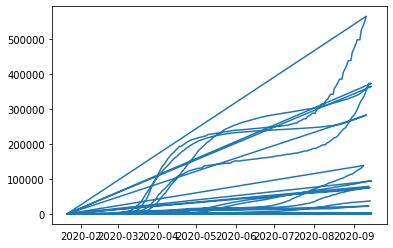

In [ ]:
plt.plot(cluster4['date'],cluster4['casos_confirmados'])

In [ ]:
cluster3=dt.loc[dt['país'].isin(['Bermuda', 'Switzerland', 'Cayman Islands', 'Ireland', 'Iceland','Luxembourg', 'Macao', 'Norway'])]


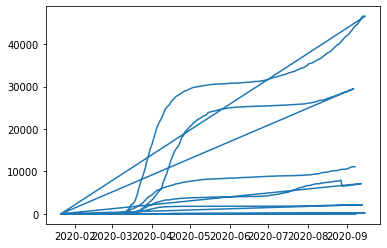

In [ ]:
plt.plot(cluster3['date'],cluster3['casos_confirmados'])

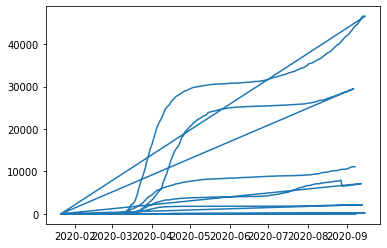

In [ ]:
cluster1=dt.loc[dt['país'].isin(['Australia','Austria','Belgium','Canada','Germany','Denmark','Finland','Gibraltar','Greenland',
                                 'Hong Kong','Netherlands','Qatar','Singapore','San Marino','Sweden','United States','British Virgin Islands'])]
plt.plot(cluster3['date'],cluster3['casos_confirmados'])

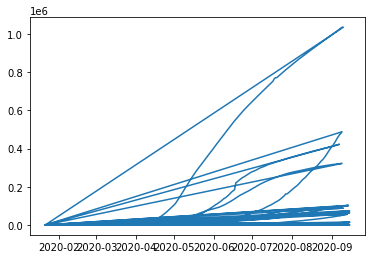

In [ ]:
cluster2=dt.loc[dt['país'].isin(['Argentina', 'Bahrain', 'Barbados', 'Chile', 'Costa Rica', 'Czech Republic', 'Estonia', 'Greece', 'Guam', 'Croatia', 'Hungary',
'Lithuania', 'Latvia', 'Mauritius', 'Malaysia', 'Oman', 'Panama', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia',
'Slovak Republic', 'Slovenia', 'Seychelles', 'Trinidad and Tobago', 'Uruguay'])]
plt.plot(cluster2['date'],cluster2['casos_confirmados'])


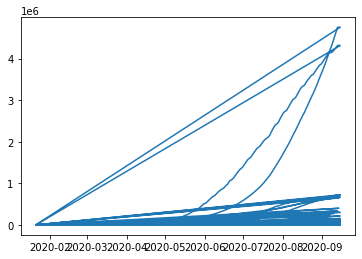

In [ ]:
cluster0=dt.loc[~dt['país'].isin(['Argentina', 'Bahrain', 'Barbados', 'Chile', 'Costa Rica', 'Czech Republic', 'Estonia', 'Greece', 'Guam', 'Croatia', 'Hungary',
'Lithuania', 'Latvia', 'Mauritius', 'Malaysia', 'Oman', 'Panama', 'Poland', 'Portugal', 'Romania', 'Russia', 'Saudi Arabia',
'Slovak Republic', 'Slovenia', 'Seychelles', 'Trinidad and Tobago', 'Uruguay','Australia','Austria','Belgium','Canada','Germany','Denmark','Finland','Gibraltar','Greenland',
                                 'Hong Kong','Netherlands','Qatar','Singapore','San Marino','Sweden','United States','British Virgin Islands','Bermuda', 'Switzerland', 'Cayman Islands', 'Ireland', 'Iceland','Luxembourg', 'Macao', 'Norway',
                                 'Aruba','Andorra','United Arab Emirates','Brunei','Cyprus','Spain','France','United Kingdom',
                          'Israel','Italy','Japan','South Korea','Kuwait','New Zealand','Puerto Rico','Turks and Caicos Islands' ])]
plt.plot(cluster0['date'],cluster0['casos_confirmados'])

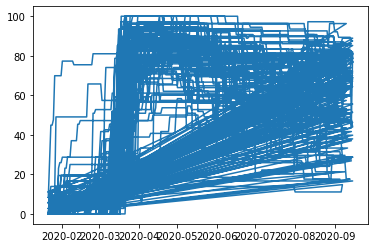

In [ ]:
plt.plot(cluster0['date'],cluster0['stringency_index'])

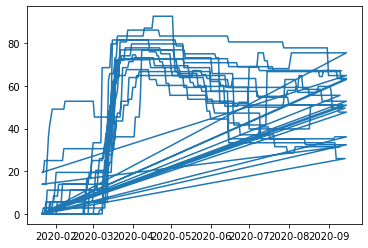

In [ ]:
plt.plot(cluster1['date'],cluster1['stringency_index'])

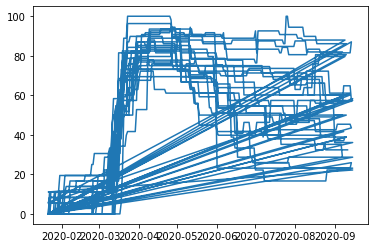

In [ ]:
plt.plot(cluster2['date'],cluster2['stringency_index'])

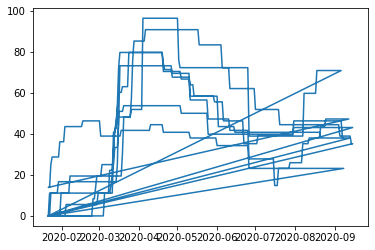

In [ ]:
plt.plot(cluster3['date'],cluster3['stringency_index'])

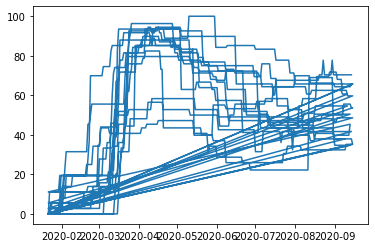

In [ ]:
plt.plot(cluster4['date'],cluster4['stringency_index'])